# Week 05 - Lab Exercises: Regression and Classification

This week's exercises use the following datasets:

- adult data
- iris data
- wine quality data

Please ensure you have these datasets available. The were included in week 04's lab exercise package.

Before working on this lab exercises, you should first walk through the Week 05 Examples notebook.


# Preparation

Please ensure all the required packages and data set are imported before proceeding to the tasks.

In [1]:
import pandas as pd
import numpy as np

#import pyplot from matplotlib for data visualisation
from matplotlib import pyplot as plt
#import Axes3D for some of the 3D visualisation
from mpl_toolkits.mplot3d import Axes3D

In [40]:
#import data in this cell

adult_data = pd.read_csv('./data/adult/adult_full.data')
iris_data = pd.read_csv('./data/iris/iris.data')
wine_quality_white = pd.read_csv('./data/wine-quality/winequality-white.csv', delimiter=';')
wine_quality_red = pd.read_csv('./data/wine-quality/winequality-red.csv', delimiter=';')

## Task 1: Adult Data - Sex and Salary

Based on the following code from Example 3, calculate the Chi square of sex/salary using a set of modified expected values.

The modified expected values should be based on the assumption:
- Male and Female should each be 50% of the population
- The percentage of <=50K is 70% and >50K is 30%

How does the Chi square value change compared to the one in Example 3?

In [3]:
from scipy.stats import chisquare

fd = pd.crosstab(adult_data.loc[:,'sex'],adult_data.loc[:,'salary'])


 #u(F,  <= 50K) 0.5 * 0.7 * 48842 =  17,094.7
 #u(F, >50k) 0.5 * 0.3 * 48842 = 7,326.3
 #u(M,  <= 50K) 0.5 * 0.7 * 48842 =  17,094.7
 #u(M, >50k) 0.5 * 0.3 * 48842 = 7,326.3


#TODO: Compute the expected values based on the assumption male/female is 50%/50%, and <=50K/>50K is 70%/30%
expected = np.array([[17094.7,7326.3], [17094.7,7326.3]])

#N.B. we used flatten here so that the chisquare method treats the entire cross table as one data series
# By default, chisquare treats each column as a series
stats, p = chisquare(fd.to_numpy().flatten(), f_exp=expected.flatten(), ddof=1)

print('Chi square is', stats, 'p-value is', p)

Chi square is 7408.823432603866 p-value is 0.0


## Task 2: Iris Data - Error Evaluation of Multiple Regression

Using the multiple linear regression example from Example 2 as the basis, calculate the Sum Square Error, Mean Square Error and Root Mean Square Error.

In [4]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()

#Multiple regression: (sepal length, sepal width, pedal length) -> pedal width
linreg.fit(iris_data.loc[:,['sepal_length','sepal_width','pedal_length']], iris_data.pedal_width)

linreg.coef_

#Predict pedal width from 'sepal length', 'sepal width' and 'pedal length'
predicted_width = linreg.predict(iris_data.loc[:,['sepal_length','sepal_width','pedal_length']])

#TODO: Calculate the SSE, MSE and RMSE of this linear regression
#calculate the sum square error (SSE)
sse = np.sum(np.square(predicted_width - iris_data.pedal_width))

#calculate the mean square error (MSE)
mse = np.mean(np.square(predicted_width - iris_data.pedal_width))

#calculate the root mean square error (RMS)
rms = np.sqrt(mse)

print('SSE=', sse, 'MSE=', mse, 'RMS=', rms)

SSE= 5.376166371766756 MSE= 0.0358411091451117 RMS= 0.18931748240749374


## Task 3: Iris Data - Evaluate K-Means Classification Accuracy

The code fragment below uses the K-means method to create 3 clusters of the iris data.

You task here is to evaluate its accuracy in classifying the three species of iris data, setosa, virginica and versicolor.

You may simply present the accuracy in percentage, e.g. setosa 95% means 95% of the setoas are correctly classified.

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

irisFeatures = iris_data.iloc[:,0:4].to_numpy()

iris_data['type']=iris_data.type.astype('category')

y = iris_data['type'].cat.codes

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(irisFeatures)

pred = kmeans.predict(irisFeatures)

score = accuracy_score(y,pred)

print("Accuracy:" + str(score * 100) + "%")


Accuracy:64.66666666666666%


## Task 4: Wine Quality Data - Regression and Classification

### Task 4a: Examine variable dependencies

Use Pearson's linear correlation to examine all pair-wise variable dependencies of the wine quality data.

In [20]:
wine_quality_white.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


### Task 4b: Apply Linear regression

From the results of task 4a, 

- select a pair of variables that have strong correlation, i.e. absolute value greater than 0.7, and use linear regression to model their relationship. 
- select a pair of variables that have weak correlation, i.e. absolute value less than 0.5, and use linear regression to model their relationship

Additionally, use visualisation to show the result of the linear regression and its RMS error bounds.

Text(0, 0.5, 'Residual sugar')

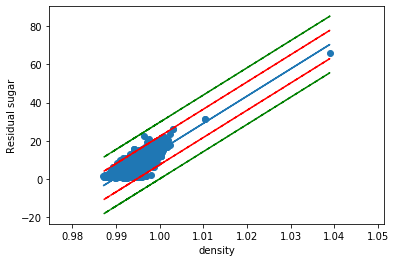

In [22]:
#Strong variable pair in this cell


linreg = linear_model.LinearRegression()
linreg.fit(wine_quality_white.density.to_numpy().reshape(-1,1), wine_quality_white['residual sugar'])



#calculate the mean square error (MSE)
mse = np.mean(np.square(wine_quality_white.density - wine_quality_white['residual sugar']))

#calculate the root mean square error (RMS)
rms = np.sqrt(mse)


fig = plt.figure()

axis = fig.add_subplot(111)

axis.scatter(wine_quality_white.density, wine_quality_white['residual sugar'])


predictedSugar = linreg.predict(wine_quality_white.density.to_numpy().reshape(-1,1))


axis.plot(wine_quality_white.density, predictedSugar)

#Visualise the bounds of one RMS
axis.plot(wine_quality_white.density, predictedSugar+rms, '--', color='r')
axis.plot(wine_quality_white.density, predictedSugar-rms, '--', color='r')

#Visualise the bounds of two RMS
axis.plot(wine_quality_white.density, predictedSugar+rms*2.0, '--', color='g')
axis.plot(wine_quality_white.density, predictedSugar-rms*2.0, '--', color='g')

axis.set_xlabel('density')
axis.set_ylabel('Residual sugar')

Text(0, 0.5, 'Free sulfur dioxide')

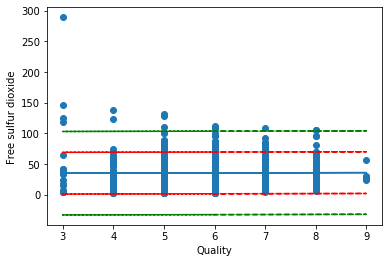

In [9]:
#Weak variable pair in this cell


linreg = linear_model.LinearRegression()
linreg.fit(wine_quality_white.quality.to_numpy().reshape(-1,1), wine_quality_white['free sulfur dioxide'])



#calculate the mean square error (MSE)
mse = np.mean(np.square(wine_quality_white.quality - wine_quality_white['free sulfur dioxide']))

#calculate the root mean square error (RMS)
rms = np.sqrt(mse)


fig = plt.figure()

axis = fig.add_subplot(111)

axis.scatter(wine_quality_white.quality, wine_quality_white['free sulfur dioxide'])

predictedSulphar = linreg.predict(wine_quality_white.quality.to_numpy().reshape(-1,1))


axis.plot(wine_quality_white.quality, predictedSulphar)

#Visualise the bounds of one RMS
axis.plot(wine_quality_white.quality, predictedSulphar+rms, '--', color='r')
axis.plot(wine_quality_white.quality, predictedSulphar-rms, '--', color='r')

#Visualise the bounds of two RMS
axis.plot(wine_quality_white.quality, predictedSulphar+rms*2.0, '--', color='g')
axis.plot(wine_quality_white.quality, predictedSulphar-rms*2.0, '--', color='g')

axis.set_xlabel('Quality')
axis.set_ylabel('Free sulfur dioxide')



### Task 4c: Apply logistic regression

Use logistic regression to classify the wine data into red and white, and show the accuracy of the classifier. Please, note you can select any combination of attributes as input features. You may also keep experimenting with different feature sets as input to see their effect on the classification accuracy.

In [45]:
from sklearn.linear_model import LogisticRegression

#Add colour column
wine_quality_red['colour'] = 'red'
wine_quality_white['colour'] = 'white'
#add to array
wine_data = [wine_quality_red,wine_quality_white]
#combine them so we can all data
wineDataDf = pd.concat(wine_data)
#set colourid as category
wineDataDf['colourid']=wineDataDf.colour.astype('category')
#selected features
features = wineDataDf.loc[:,['volatile acidity','total sulfur dioxide', 'residual sugar']].to_numpy()
colour = wineDataDf.colourid.cat.codes

#classify and output the accuracy
classifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
classifier.fit(features, colour)
print("Accuracy is " + str(classifier.score(features,colour) * 100) + "%")


Accuracy is 95.474834539018%


### Task 4d: Apply K-means clustering

Use the K-means method to create clusters from the wine data based on the quality atribute. Similar to Task 4c, you may use all or subset of attributes as input features.

Show the visualisation of K-means using Scatter plot (if no. of features is 3 or fewer), parallel-coordiantes (if no. of features is 4 or greater) 

In [46]:
from sklearn.cluster import KMeans

features = wineDataDf.iloc[:,[1,6,3]].to_numpy()

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(features)

kmeans.predict(wineDataDf.iloc[:11,[1,6,3]])


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

[[  0.29659694 114.80357143   4.93112245]
 [  0.47716923  39.71753846   2.51381538]
 [  0.28955228 181.12267081   8.6864648 ]]


<IPython.core.display.Javascript object>


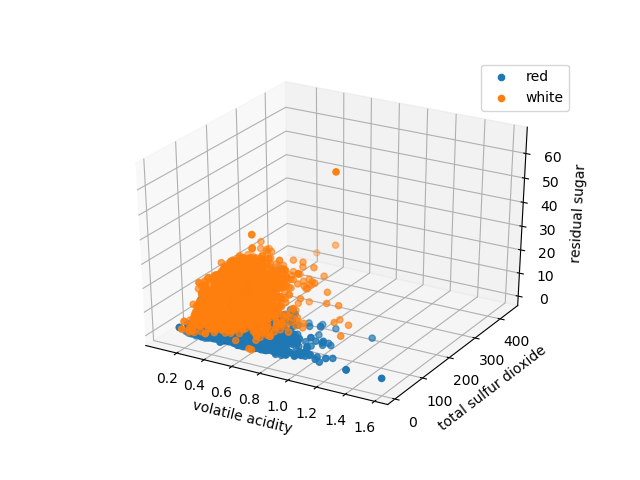

In [47]:
%matplotlib notebook


centres = kmeans.cluster_centers_

print(centres)

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = wineDataDf.groupby(by='colour')

axis.set_xlabel('volatile acidity')
axis.set_ylabel('total sulfur dioxide')
axis.set_zlabel('residual sugar')

for name, group in groups:
    axis.scatter(group['volatile acidity'], group['total sulfur dioxide'], group['residual sugar'], label=name)
    
axis.scatter(centres[:,0], centres[:,1], centres[:,2], marker='^', color='k', s=200, alpha=1)
    
axis.legend()
plt.show()